# Scott Breitbach
## 30-March-2021
## DSC550, Week 3

# 3.2 Exercise: Graph Analysis

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

Prepare Dataset:

In [2]:
irisDF = pd.DataFrame(datasets.load_iris().data)
irisDF.columns = datasets.load_iris().feature_names
irisDF['target'] = datasets.load_iris().target
irisDF['flower name'] = datasets.load_iris().target
rename = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
irisDF.replace({'flower name': rename}, inplace=True)

In [3]:
irisDF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## A) Display the same analysis (of the same data) using 3 different charts

## B) Use appropriate, complete, professional labeling

## C) Rank your charts from most effective to least effective

In [4]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 20

Populating the interactive namespace from numpy and matplotlib


In [5]:
cmap = plt.get_cmap('tab20c')
colors = cmap(np.arange(4)*4)

### Rank #1: Scatter Plot

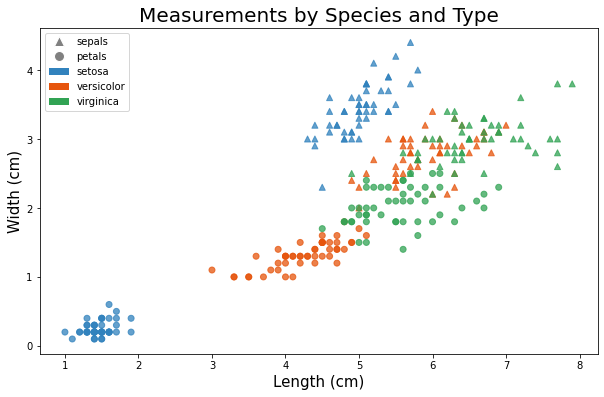

In [6]:
colors = {'setosa': cmap([0])[0], 'versicolor': cmap([4])[0], 'virginica': cmap([8])[0]}

plt.scatter('sepal length (cm)', 'sepal width (cm)', marker="^", alpha=.75,
            c=irisDF['flower name'].map(colors), data=irisDF)
plt.scatter('petal length (cm)', 'petal width (cm)', alpha=.75,
            c=irisDF['flower name'].map(colors), data=irisDF)

legend_elements = [Line2D([0], [0], marker='^', color='w', markerfacecolor='gray', label='sepals', markersize=10),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', label='petals', markersize=10),
                   Patch(facecolor=cmap([0])[0], label='setosa'), 
                   Patch(facecolor=cmap([4])[0], label='versicolor'), 
                   Patch(facecolor=cmap([8])[0], label='virginica')]
plt.legend(handles=legend_elements, loc=2)

plt.xlabel('Length (cm)', size=15)
plt.ylabel('Width (cm)', size=15)
plt.title('Measurements by Species and Type', )

plt.show()

### Rank #2: Bar Chart

In [7]:
labels = ['sepal length', 'sepal width', 'petal length', 'petal width']
setosa_means = [irisDF['sepal length (cm)'].groupby(irisDF['flower name']).mean()[0], 
                irisDF['sepal width (cm)'].groupby(irisDF['flower name']).mean()[0], 
                irisDF['petal length (cm)'].groupby(irisDF['flower name']).mean()[0], 
                irisDF['petal width (cm)'].groupby(irisDF['flower name']).mean()[0]]
versicolor_means = [irisDF['sepal length (cm)'].groupby(irisDF['flower name']).mean()[1], 
                irisDF['sepal width (cm)'].groupby(irisDF['flower name']).mean()[1], 
                irisDF['petal length (cm)'].groupby(irisDF['flower name']).mean()[1], 
                irisDF['petal width (cm)'].groupby(irisDF['flower name']).mean()[1]]
virginica_means = [irisDF['sepal length (cm)'].groupby(irisDF['flower name']).mean()[2], 
                irisDF['sepal width (cm)'].groupby(irisDF['flower name']).mean()[2], 
                irisDF['petal length (cm)'].groupby(irisDF['flower name']).mean()[2], 
                irisDF['petal width (cm)'].groupby(irisDF['flower name']).mean()[2]]

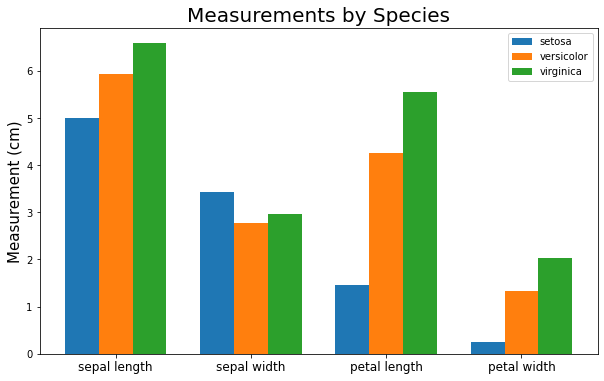

In [8]:
x = np.arange(len(labels))
width = 0.25

plt.bar(x - width, setosa_means, width, label='setosa')
plt.bar(x, versicolor_means, width, label='versicolor')
plt.bar(x + width, virginica_means, width, label='virginica')

plt.ylabel('Measurement (cm)', size=15)
plt.xticks(x, (labels), size=12)
plt.title('Measurements by Species')
plt.legend()

plt.show()

### Rank #3: Pie Chart

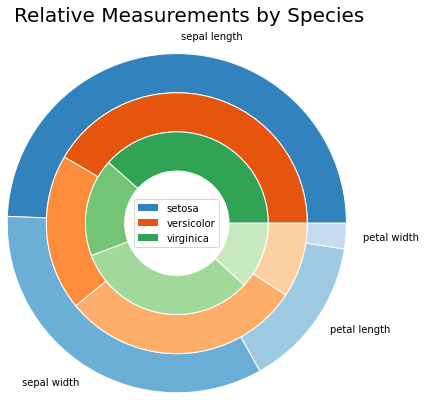

In [9]:
size = 0.3
fig, ax = plt.subplots()
fig.set_facecolor('white')

plt.pie(setosa_means, radius=1+size, colors=cmap([0, 1, 2, 3]), labels=labels, 
        wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(versicolor_means, radius=1, colors=cmap([4, 5, 6, 7]), 
        wedgeprops=dict(width=size, edgecolor='w'))
plt.pie(virginica_means, radius=1-size, colors=cmap([8, 9, 10, 11]),
        wedgeprops=dict(width=size, edgecolor='w'))

legend_elements = [Patch(facecolor=cmap([0])[0], label='setosa'), 
                   Patch(facecolor=cmap([4])[0], label='versicolor'), 
                   Patch(facecolor=cmap([8])[0], label='virginica')]
plt.legend(handles=legend_elements, loc=10)

plt.rcParams['axes.titley'] = 1.1
plt.title('Relative Measurements by Species', loc='left')

plt.show()

## D) Write a 300-word paper justifying your ranking

Upon completing the charts, I couldn’t really figure out how to rank them (perhaps I had been staring at them too long). So, I asked my wife (as an outsider) which she thought was the best at portraying the information in an understandable way. So we discussed it a bit, then I slept on it and now, looking at it with fresh eyes, I’ve determined she was right (as usual). This may sound like a cop-out for ranking visuals like these charts, but in reality you’re going to be dealing with a variety of people who will have vast differences in understanding the subject matter and a large part of using charts is to portray information in a way that is succinct, but clear, and accessible to your audience.  

Now, while each of the charts portrays the same data, some are able to provide more information. I ranked the scatterplot as number one because it portrays the most information, and does so in a way that easily allows you to compare and contrast the different groupings. You can see where each species clusters for sepals and petals, as well as the similarities and differences between them. I don’t know how well it would work with having both petals and sepals on there, but I’ve also seen scatter plots that have histograms on the top and sides and I think that could be a nice addition.   

The bar chart, ranked second, also does a decent job of allowing you to compare and contrast not only between the species, but also between the different measurements. However, you do lose some information because I had to chart the means for each category instead of plotting the individual points.  

Lastly the pie chart. I went back and forth on whether I should put three separated pie charts, one for each species or put them all in one like I did, but I do like how it turned out. Again you lose a bit more information because instead of seeing the actual means, you now get essentially the percentage out of 100 that each mean contributes to the whole, but I think it does a decent job of showing relative sizes, and I was able to maintain the same color scheme as used in the previous charts, for consistency. 
